#  Import Packages

In [51]:
import warnings
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

* Ignore Warning from sklearn library

In [52]:
# Filter out the specific warning
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

#  Read Dataset & Info

In [53]:
df = pd.read_csv('experience_data.csv')

In [54]:
print("Data Shape:" , df.shape , "\n")
print("Data Head : \n")
df.head(10)

Data Shape: (300, 2) 

Data Head : 



,Days_of_work,Experience_rate
0,77.0,79.775152
1,21.0,23.177279
2,22.0,25.609262
3,20.0,17.857388
4,36.0,41.849864
5,15.0,9.805235
6,62.0,58.874659
7,95.0,97.617937
8,20.0,18.395127
9,NaN,NaN


In [55]:
df.describe()

,Days_of_work,Experience_rate
count,288.000000,291.000000
mean,51.243056,51.278482
std,28.589671,29.262819
min,0.000000,-3.467884
25%,27.000000,25.622012
50%,53.000000,52.459467
75%,73.250000,74.475252
max,100.000000,105.591837


In [56]:
df.info() #info of non null columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Days_of_work     288 non-null    float64
 1   Experience_rate  291 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


In [57]:
#Sum of NaN values
df.isna().sum()

Days_of_work       12
Experience_rate     9
dtype: int64

In [58]:
df.dtypes

Days_of_work       float64
Experience_rate    float64
dtype: object

#  Data PreProcessing

In [59]:
print(df.columns.tolist())

['Days_of_work', 'Experience_rate']


In [60]:
#Putting columns with NaN values in a list
nan = []
for column in df.columns:
    if df[column].isna().sum():
        nan.append(column)
print(nan)

['Days_of_work', 'Experience_rate']


In [61]:
#Filling the NaN values with the mean
for column in nan:
    df[column].fillna(df[column].mean(), inplace=True)

In [62]:
df.isna().sum()

Days_of_work       0
Experience_rate    0
dtype: int64

#  **Model**

In [63]:
# Split the data into features and target
X = df.drop('Experience_rate', axis=1) # features
y = df['Experience_rate']              # target

# scaler = StandardScaler()
# X = scaler.fit_transform(X)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [64]:
# Initialize the model
regr = LinearRegression()

# Train the Model
regr.fit(X_train, y_train)

# Test the Model
y_pred = regr.predict(X_test)

# Prediction

In [65]:
# Predict New Values:
new_data_scaled = scaler.transform([[58]])
new_predictions = regr.predict(new_data_scaled)
print(new_predictions)

[58.02387975]


# Visualisation

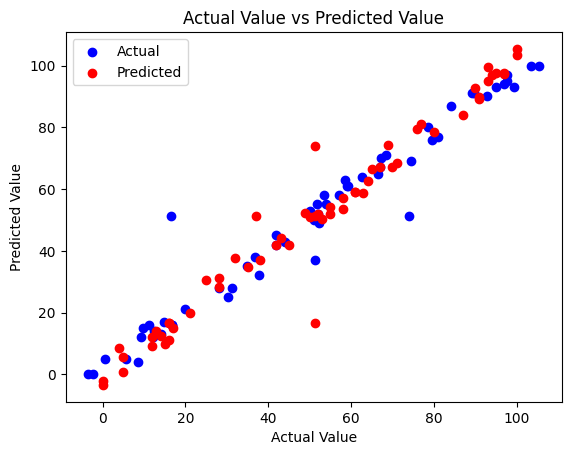

In [66]:
# Assuming y_test and y_pred are your actual and predicted values
# Scatter plot for actual vs predicted values, actual in blue and predicted in red
plt.scatter(y_test, y_pred, color='blue', label='Actual')
plt.scatter(y_pred, y_test, color='red', label='Predicted')
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Actual Value vs Predicted Value")
plt.legend()
plt.show()

# Evaluation

In [67]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 3.462727282580249
Root Mean Squared Error: 6.33734818230008
R-squared: 0.9591668065859641
